# 5.2 噪声模型

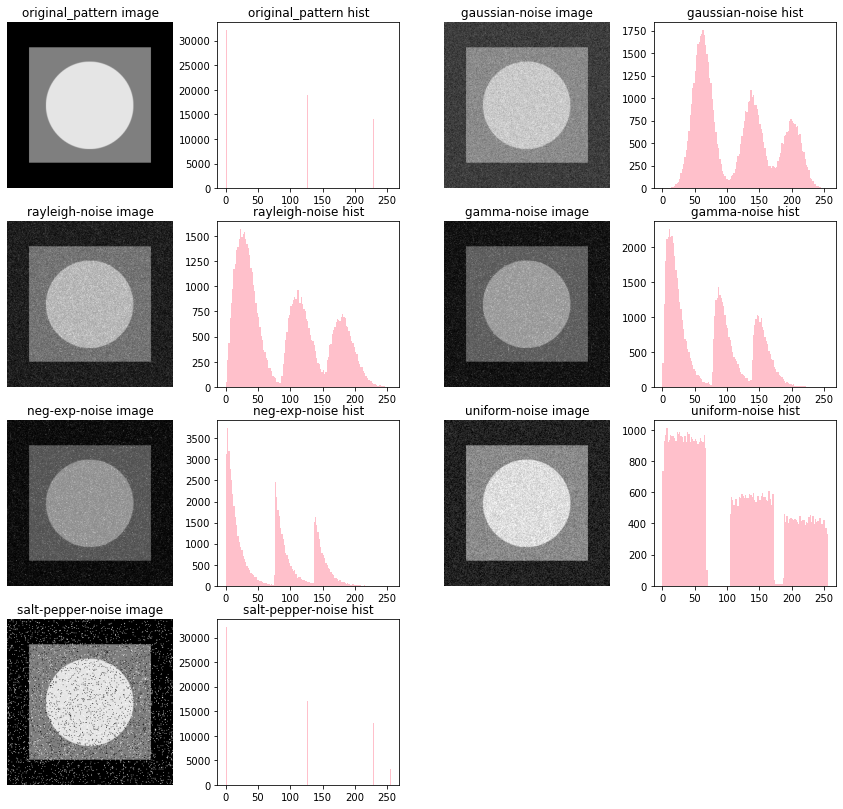

In [82]:
import numpy as np
import tifffile as tiff
import matplotlib.pyplot as plt

addr = ["G:/Python/图像数字处理/第五章 图像复原与重建/DIP3E_CH05_Original_Images/Fig0503 (original_pattern).tif",
       "G:/Python/图像数字处理/第五章 图像复原与重建/DIP3E_CH05_Original_Images/Fig0504(a)(gaussian-noise).tif",
       "G:/Python/图像数字处理/第五章 图像复原与重建/DIP3E_CH05_Original_Images/Fig0504(b)(rayleigh-noise).tif",
       "G:/Python/图像数字处理/第五章 图像复原与重建/DIP3E_CH05_Original_Images/Fig0504(c)(gamma-noise).tif",
       "G:/Python/图像数字处理/第五章 图像复原与重建/DIP3E_CH05_Original_Images/Fig0504(g)(neg-exp-noise).tif",
       "G:/Python/图像数字处理/第五章 图像复原与重建/DIP3E_CH05_Original_Images/Fig0504(h)(uniform-noise).tif",
       "G:/Python/图像数字处理/第五章 图像复原与重建/DIP3E_CH05_Original_Images/Fig0504(i)(salt-pepper-noise).tif"]

name = ['original_pattern','gaussian-noise','rayleigh-noise','gamma-noise','neg-exp-noise','uniform-noise','salt-pepper-noise']

fig = plt.figure(figsize=(15,25))
for i in range (len(addr)): 
    image = tiff.imread(addr[i])
    ax = fig.add_subplot(7,4,2*i+1)
    ax.imshow(image,cmap = 'gray',vmin=0,vmax=255)
    ax.axis('off')
    ax.set_title(f"{name[i]} image")
    ax1 = fig.add_subplot(7,4,2*i+2)
    image_reshape = image.reshape(-1)
    ax1.hist(image_reshape,bins=128,range=(0,256),color='PINK')
    ax1.set_title(f"{name[i]} hist")



# 5.3 只存在噪声的复原——空间滤波

## 5.3.1 均值滤波器

In [162]:
# 算术平均滤波器
def BoxFilter(m,n,image):
    kernel = np.ones((m,n))/(m*n)
    adjust_value_m = int((m - 1)/2)
    adjust_value_n = int((n - 1)/2)
    # 对图像进行零填充
    image_zero_filled = np.zeros((image.shape[0] + m - 1,image.shape[1] + n - 1))
    image_zero_filled[adjust_value_m:image.shape[0] + adjust_value_m,adjust_value_n:image.shape[1] + adjust_value_n] = image
    # 进行卷积运算
    new_image = np.zeros((image.shape[0],image.shape[1]))
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            new_image[i,j] = np.sum(kernel*image_zero_filled[i:i+m,j:j+n])
    return new_image

# 几何平均滤波器
def GeometryMeanFilter(m,n,image):
    kernel = np.ones((m,n))/(m*n)
    adjust_value_m = int((m - 1)/2)
    adjust_value_n = int((n - 1)/2)
    # 对图像进行零填充
    image_zero_filled = np.zeros((image.shape[0] + m - 1,image.shape[1] + n - 1))
    image_zero_filled[adjust_value_m:image.shape[0] + adjust_value_m,adjust_value_n:image.shape[1] + adjust_value_n] = image
    # 进行卷积运算
    new_image = np.ones((image.shape[0],image.shape[1]))
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            temp_array = image_zero_filled[i:i+m,j:j+n]
            for k in range(m):
                for l in range(n):
                    new_image[i,j] *= temp_array[k,l]
            new_image[i,j] = np.power(new_image[i,j],1/(m*n))
    return new_image

# 谐波平均滤波器
def HarmonicMeanFilter(m,n,image):
    kernel = np.ones((m,n))/(m*n)
    adjust_value_m = int((m - 1)/2)
    adjust_value_n = int((n - 1)/2)
    # 对图像进行零填充
    image_zero_filled = np.ones((image.shape[0] + m - 1,image.shape[1] + n - 1))
    image_zero_filled[adjust_value_m:image.shape[0] + adjust_value_m,adjust_value_n:image.shape[1] + adjust_value_n] = image
    # 进行卷积运算
    new_image = np.zeros((image.shape[0],image.shape[1]))
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            temp_array = image_zero_filled[i:i+m,j:j+n]
            for k in range(m):
                for l in range(n):
                    new_image[i,j] += 1/(temp_array[k,l]+1e-8)
            new_image[i,j] = (m*n)/new_image[i,j]
    return new_image

def InverseHarmonicMeanFilter(m,n,q,image):
    kernel = np.ones((m,n))/(m*n)
    adjust_value_m = int((m - 1)/2)
    adjust_value_n = int((n - 1)/2)
    # 对图像进行零填充
    image_zero_filled = np.ones((image.shape[0] + m - 1,image.shape[1] + n - 1))
    image_zero_filled[adjust_value_m:image.shape[0] + adjust_value_m,adjust_value_n:image.shape[1] + adjust_value_n] = image
    # 进行卷积运算
    new_image = np.zeros((image.shape[0],image.shape[1]))
    up = np.zeros((image.shape[0],image.shape[1]))
    down = np.zeros((image.shape[0],image.shape[1]))
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            new_image[i,j] = np.sum(np.power(image_zero_filled[i:i+m,j:j+n]+1e-8,q+1))/(np.sum(np.power(image_zero_filled[i:i+m,j:j+n]+1e-8,q))+1e-8)
    return new_image

Text(0.5, 1.0, 'geomean_filter')

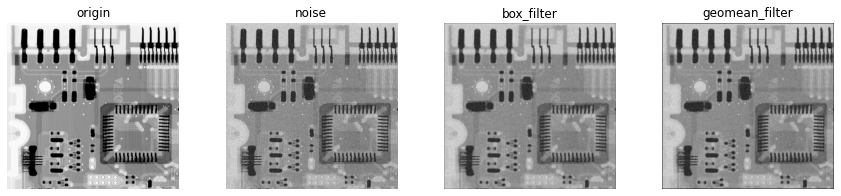

In [163]:
import numpy as np
import tifffile as tiff
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,25))
image = tiff.imread("G:/Python/图像数字处理/第五章 图像复原与重建/DIP3E_CH05_Original_Images/Fig0507(a)(ckt-board-orig).tif")
ax = fig.add_subplot(7,4,1)
ax.imshow(image,cmap = 'gray',vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"origin")

image_noise = tiff.imread("G:/Python/图像数字处理/第五章 图像复原与重建/DIP3E_CH05_Original_Images/Fig0507(b)(ckt-board-gauss-var-400).tif")
ax = fig.add_subplot(7,4,2)
ax.imshow(image_noise,cmap = 'gray',vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"noise")

image_box = BoxFilter(3,3,image_noise)
ax = fig.add_subplot(7,4,3)
ax.imshow(image_box,cmap = 'gray',vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"box_filter")

image_geo = GeometryMeanFilter(3,3,image_noise)
ax = fig.add_subplot(7,4,4)
ax.imshow(image_geo,cmap = 'gray',vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"geomean_filter")


Text(0.5, 1.0, 'inverseharmonic filter')

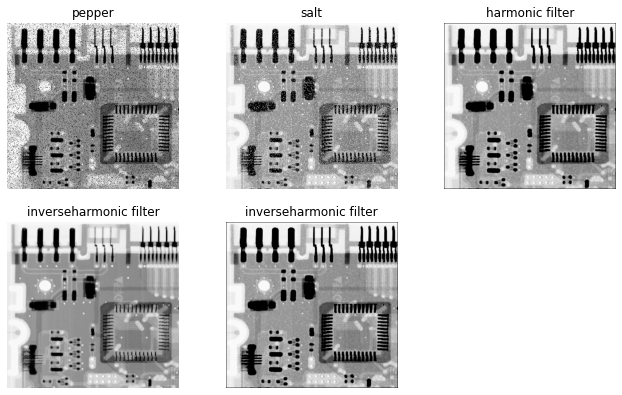

In [167]:
import numpy as np
import tifffile as tiff
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,25))
image_pepper = tiff.imread("G:/Python/图像数字处理/第五章 图像复原与重建/DIP3E_CH05_Original_Images/Fig0508(a)(circuit-board-pepper-prob-pt1).tif")
ax = fig.add_subplot(7,4,1)
ax.imshow(image_pepper,cmap = 'gray',vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"pepper")

image_salt = tiff.imread("G:/Python/图像数字处理/第五章 图像复原与重建/DIP3E_CH05_Original_Images/Fig0508(b)(circuit-board-salt-prob-pt1).tif")
ax = fig.add_subplot(7,4,2)
ax.imshow(image_salt,cmap = 'gray',vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"salt")

image_har = HarmonicMeanFilter(3,3,image_salt)
ax = fig.add_subplot(7,4,3)
ax.imshow(image_har,cmap = 'gray',vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"harmonic filter")


image_inversehar = InverseHarmonicMeanFilter(3,3,1.5,image_pepper)
ax = fig.add_subplot(7,4,5)
ax.imshow(image_inversehar,cmap = 'gray',vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"inverseharmonic filter")


image_inversehar = InverseHarmonicMeanFilter(3,3,-1.5,image_salt)
ax = fig.add_subplot(7,4,6)
ax.imshow(image_inversehar,cmap = 'gray',vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"inverseharmonic filter")

## 5.3.2 统计排序滤波器

In [214]:
# 中值滤波器
def MediumFilter(m,n,image):
    adjust_value_m = int((m - 1)/2)
    adjust_value_n = int((n - 1)/2)
    # 对图像进行复制填充
    image_zero_filled = np.zeros((image.shape[0] + m - 1,image.shape[1] + n - 1))
    image_zero_filled[adjust_value_m:image.shape[0] + adjust_value_m,adjust_value_n:image.shape[1] + adjust_value_n] = image
    new_image = np.zeros((image.shape[0],image.shape[1]))
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            new_image[i,j] = np.median(image_zero_filled[i:i+m,j:j+n])
    return new_image

# 最小值滤波器
def MinFilter(m,n,image):
    adjust_value_m = int((m - 1)/2)
    adjust_value_n = int((n - 1)/2)
    # 对图像进行复制填充
    image_zero_filled = np.zeros((image.shape[0] + m - 1,image.shape[1] + n - 1))
    image_zero_filled[adjust_value_m:image.shape[0] + adjust_value_m,adjust_value_n:image.shape[1] + adjust_value_n] = image
    new_image = np.zeros((image.shape[0],image.shape[1]))
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            new_image[i,j] = np.min(image_zero_filled[i:i+m,j:j+n])
    return new_image

# 最大值滤波器
def MaxFilter(m,n,image):
    adjust_value_m = int((m - 1)/2)
    adjust_value_n = int((n - 1)/2)
    # 对图像进行复制填充
    image_zero_filled = np.zeros((image.shape[0] + m - 1,image.shape[1] + n - 1))
    image_zero_filled[adjust_value_m:image.shape[0] + adjust_value_m,adjust_value_n:image.shape[1] + adjust_value_n] = image
    new_image = np.zeros((image.shape[0],image.shape[1]))
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            new_image[i,j] = np.max(image_zero_filled[i:i+m,j:j+n])
    return new_image

# 中点值滤波器
def MidPointFilter(m,n,image):
    adjust_value_m = int((m - 1)/2)
    adjust_value_n = int((n - 1)/2)
    # 对图像进行复制填充
    image_zero_filled = np.zeros((image.shape[0] + m - 1,image.shape[1] + n - 1))
    image_zero_filled[adjust_value_m:image.shape[0] + adjust_value_m,adjust_value_n:image.shape[1] + adjust_value_n] = image
    new_image = np.zeros((image.shape[0],image.shape[1]))
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            new_image[i,j] =(np.min(image_zero_filled[i:i+m,j:j+n])+np.max(image_zero_filled[i:i+m,j:j+n]))/2
    return new_image

# 修正阿尔法均值滤波器 （此处定义的d为左右两边减去的值）
def ModifiedAlphaMeanFilter(m,n,d,image):
    adjust_value_m = int((m - 1)/2)
    adjust_value_n = int((n - 1)/2)
    # 对图像进行复制填充
    image_zero_filled = np.zeros((image.shape[0] + m - 1,image.shape[1] + n - 1))
    image_zero_filled[adjust_value_m:image.shape[0] + adjust_value_m,adjust_value_n:image.shape[1] + adjust_value_n] = image
    new_image = np.zeros((image.shape[0],image.shape[1]))
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            sorted_matrix = np.sort(np.reshape(image_zero_filled[i:i+m,j:j+n],-1))
            new_image[i,j] = np.sum(sorted_matrix[d:m*n-d])/(m*n - 2*d)
    return new_image

Text(0.5, 1.0, 'min')

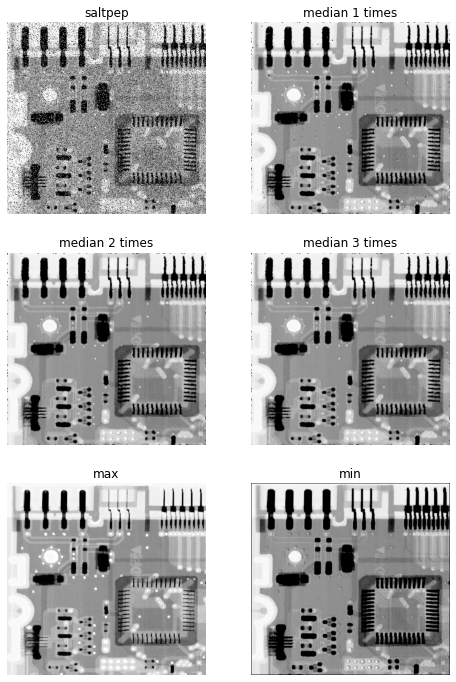

In [227]:
import numpy as np
import tifffile as tiff
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,12))
image_saltpep = tiff.imread("G:/Python/图像数字处理/第五章 图像复原与重建/DIP3E_CH05_Original_Images/Fig0510(a)(ckt-board-saltpep-prob.pt05).tif")
ax = fig.add_subplot(3,2,1)
ax.imshow(image_saltpep,cmap = 'gray',vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"saltpep")

# 对椒盐噪声中值滤波一次
image_median = MediumFilter(3,3,image_saltpep)
ax = fig.add_subplot(3,2,2)
ax.imshow(image_median,cmap = 'gray',vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"median 1 times")

# 对椒盐噪声中值滤波第二次
image_median2 = MediumFilter(3,3,image_median)
ax = fig.add_subplot(3,2,3)
ax.imshow(image_median2,cmap = 'gray',vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"median 2 times")

# 对椒盐噪声中值滤波第三次
image_median3 = MediumFilter(3,3,image_median2)
ax = fig.add_subplot(3,2,4)
ax.imshow(image_median3,cmap = 'gray',vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"median 3 times")

# 对胡椒噪声进行最大值滤波
image_max = MaxFilter(3,3,image_pepper)
ax = fig.add_subplot(3,2,5)
ax.imshow(image_max,cmap = 'gray',vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"max")

# 对盐噪声进行最小值滤波 
image_min = MinFilter(3,3,image_salt)
ax = fig.add_subplot(3,2,6)
ax.imshow(image_min,cmap = 'gray',vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"min")

Text(0.5, 1.0, 'modifiy alpha mean')

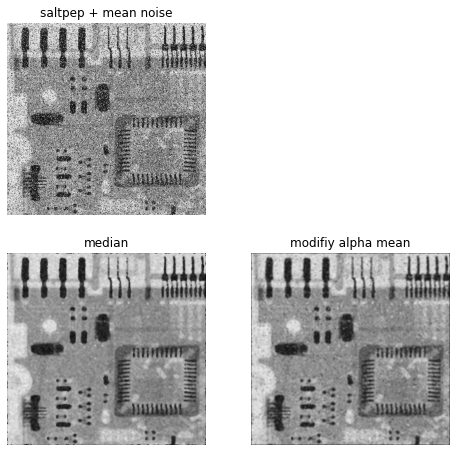

In [226]:
import numpy as np
import tifffile as tiff
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,12))
image_saltpep = tiff.imread("G:/Python/图像数字处理/第五章 图像复原与重建/DIP3E_CH05_Original_Images/Fig0512(b)(ckt-uniform-plus-saltpepr-prob-pt1).tif")
ax = fig.add_subplot(3,2,1)
ax.imshow(image_saltpep,cmap = 'gray',vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"saltpep + mean noise")

# 均值滤波器
image_median = MediumFilter(5,5,image_saltpep)
ax = fig.add_subplot(3,2,3)
ax.imshow(image_median,cmap = 'gray',vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"median")

# 修正阿尔法均值滤波器
image_alpha = ModifiedAlphaMeanFilter(5,5,3,image_saltpep)
ax = fig.add_subplot(3,2,4)
ax.imshow(image_alpha,cmap = 'gray',vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"modifiy alpha mean")



## 5.3.3 自适应滤波器

In [308]:
# 自适应局部降噪滤波器
def AdaptiveLocalNoiseReductionFilter(m,n,sigma_noise,image):
    adjust_value_m = int((m - 1)/2)
    adjust_value_n = int((n - 1)/2)
    # 对图像进行复制填充
    image_zero_filled = np.zeros((image.shape[0] + m - 1,image.shape[1] + n - 1))
    image_zero_filled[adjust_value_m:image.shape[0] + adjust_value_m,adjust_value_n:image.shape[1] + adjust_value_n] = image
    new_image = np.zeros((image.shape[0],image.shape[1]))
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rate = (sigma_noise/np.var(image_zero_filled[i:i+m,j:j+n]))
            # 对值进行计算并对大于1的值置1
            if rate >= 1:
                rate = 1
            new_image[i,j] = image[i,j] - rate*(image[i,j] - np.mean(image_zero_filled[i:i+m,j:j+n]))
    return new_image

# 自适应中值滤波器
def AdaptiveMedianFilter(smin,smax,image):
    adjust_value_m = int((smax - 1)/2)
    adjust_value_n = int((smax - 1)/2)
    # 对图像进行复制填充
    image_zero_filled = np.zeros((image.shape[0] + smax - 1,image.shape[1] + smax - 1))
    image_zero_filled[adjust_value_m:image.shape[0] + adjust_value_m,adjust_value_n:image.shape[1] + adjust_value_n] = image
    new_image = np.zeros((image.shape[0],image.shape[1]))
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            kernelsize = smin
            while kernelsize <= smax:
                zmin = np.min(image_zero_filled[i:i+kernelsize,j:j+kernelsize])
                zmax = np.max(image_zero_filled[i:i+kernelsize,j:j+kernelsize])
                zmed = np.median(image_zero_filled[i:i+kernelsize,j:j+kernelsize])
                zxy  = image[i,j]
                if zmin < zmed and zmed < zmax:
                    if zmin < zxy and zxy < zmax:
                        new_image[i,j] = zxy
                        break
                    else:
                        new_image[i,j] = zmed
                        break
                else:
                    kernelsize += 2
                    new_image[i,j] = zmed
    return new_image

Text(0.5, 1.0, 'adative local')

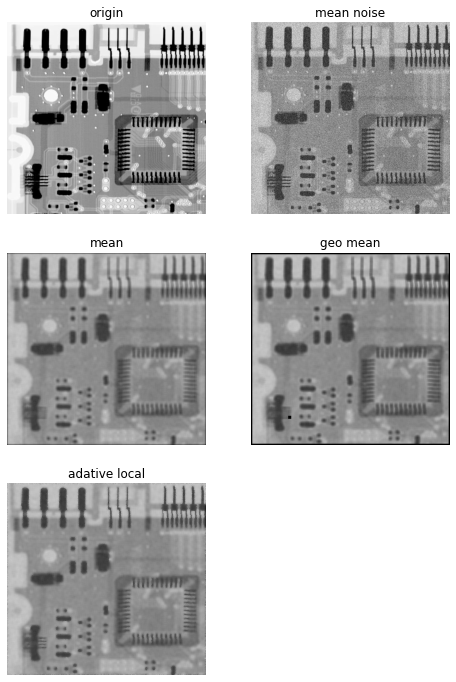

In [252]:
import numpy as np
import tifffile as tiff
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,12))

image = tiff.imread("G:/Python/图像数字处理/第五章 图像复原与重建/DIP3E_CH05_Original_Images/Fig0507(a)(ckt-board-orig).tif")
ax = fig.add_subplot(3,2,1)
ax.imshow(image,cmap = 'gray',vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"origin")

image_meannoise = tiff.imread("G:/Python/图像数字处理/第五章 图像复原与重建/DIP3E_CH05_Original_Images/Fig0513(a)(ckt_gaussian_var_1000_mean_0).tif")
ax = fig.add_subplot(3,2,2)
ax.imshow(image_meannoise,cmap = 'gray',vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"mean noise")


image_box = BoxFilter(7,7,image_meannoise)
ax = fig.add_subplot(3,2,3)
ax.imshow(image_box ,cmap = 'gray',vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"mean")

image_geomean = GeometryMeanFilter(7,7,image_meannoise)
ax = fig.add_subplot(3,2,4)
ax.imshow(image_geomean ,cmap = 'gray',vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"geo mean")

image_adative_local = AdaptiveLocalNoiseReductionFilter(7,7,1000,image_meannoise)
ax = fig.add_subplot(3,2,5)
ax.imshow(image_adative_local ,cmap = 'gray',vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"adative local")

Text(0.5, 1.0, 'AdaptiveMedianFilter')

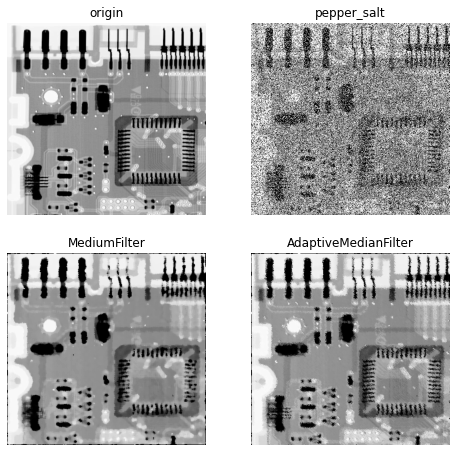

In [310]:
import numpy as np
import tifffile as tiff
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,12))

image = tiff.imread("G:/Python/图像数字处理/第五章 图像复原与重建/DIP3E_CH05_Original_Images/Fig0507(a)(ckt-board-orig).tif")
ax = fig.add_subplot(3,2,1)
ax.imshow(image,cmap = 'gray',vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"origin")

image_noise = tiff.imread("G:/Python/图像数字处理/第五章 图像复原与重建/DIP3E_CH05_Original_Images/Fig0514(a)(ckt_saltpep_prob_pt25).tif")
ax = fig.add_subplot(3,2,2)
ax.imshow(image_noise,cmap = 'gray',vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"pepper_salt")

#中值滤波
image_median = MediumFilter(7,7,image_noise)
ax = fig.add_subplot(3,2,3)
ax.imshow(image_median,cmap = 'gray',vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"MediumFilter")

# 自适应中值滤波
image_adative_median = AdaptiveMedianFilter(1,7,image_noise)
ax = fig.add_subplot(3,2,4)
ax.imshow(image_adative_median,cmap = 'gray',vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"AdaptiveMedianFilter")

# 5.4 使用频率域滤波降低周期噪声

## 5.4.1 陷波滤波深入介绍

In [4]:
def get_BNPF_H(uk,vk,d0,n,image):
    i = np.arange(image.shape[1])
    j = np.arange(image.shape[0])
    i,j = np.meshgrid(i,j)
    dk_p = np.sqrt(np.power((i - image.shape[1]//2 - uk),2) + np.power((j - image.shape[0]//2 - vk),2))
    dk_n = np.sqrt(np.power((i - image.shape[1]//2 + uk),2) + np.power((j - image.shape[0]//2 + vk),2))
    mask = (1/(1+np.power(d0/(dk_p+1e-8),n))) * (1/(1+np.power(d0/(dk_n+1e-8),n)))
    return mask

def pad_image_mirro(image):
    image_filled = np.zeros((2*image.shape[0],2*image.shape[1]))
    image_filled[0:image.shape[0],0:image.shape[1]] = image
    image_filled[image.shape[0]:2*image.shape[0],0:image.shape[1]] = image
    image_filled[0:image.shape[0],image.shape[1]:2*image.shape[1]] = image
    image_filled[image.shape[0]:2*image.shape[0],image.shape[1]:2*image.shape[1]] = image
    return image_filled

def pad_image_zero(image):
    image_filled = np.zeros((2*image.shape[0],2*image.shape[1]))
    image_filled[0:image.shape[0],0:image.shape[1]] = image
    return image_filled

def image_centralized(image):
    i = np.arange(image.shape[1])
    j = np.arange(image.shape[0])
    i,j = np.meshgrid(i,j)
    mask = np.power(-1,i+j)
    new_image = image * mask
    return new_image


In [5]:
def image_scaling(image,k):
    new_image = np.zeros((image.shape[0],image.shape[1]))
    new_image=k*(image - np.min(image))/(np.max(image) - np.min(image))
    return new_image

# a为感兴趣灰度区域最小值，b为感兴趣灰度区域的最大值,target_value为感兴趣区域调整后的灰度值
def grayscale_layer(a,b,target_value,image):
    new_image = np.zeros((image.shape[0],image.shape[1]))
    for i in range(0,image.shape[0]):
        for j in range (0,image.shape[1]):
            if (image[i,j] >= a and image[i,j] <= b):
                new_image[i,j] = target_value
            else:
                new_image[i,j] = image[i,j]
    return new_image

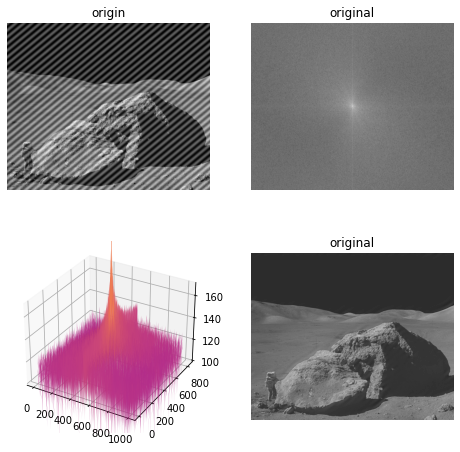

In [424]:
import numpy as np
import tifffile as tiff
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,12))

# 这个地方我不知道如何找冲击所在的位置

image = tiff.imread("G:/Python/图像数字处理/第五章 图像复原与重建/DIP3E_CH05_Original_Images/astronaut-interference.tif")
ax = fig.add_subplot(3,2,1)
ax.imshow(image,cmap = 'gray',vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"origin")

fft_specturm = np.fft.fft2(image_centralized(image))
res = np.log(1 + np.abs(fft_specturm))
res_scale = image_scaling(res,255)
ax = fig.add_subplot(3,2,2)
ax.imshow(res_scale ,cmap = 'gray',vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"original")

ax = fig.add_subplot(3,2,3,projection ='3d')
x = np.arange(res.shape[1])
y = np.arange(res.shape[0])
x,y = np.meshgrid(x,y )
ax.plot_surface(x,y,res_scale,vmin =0,vmax =255 , cmap='plasma')
ax.set_zlim(100,170)

# 对其进行滤波

# 中心化
image_pad_cen = image_centralized(image)
# 傅里叶变换
image_fft = np.fft.fft2(image_pad_cen)
# 获取低通滤波器 并进行滤波
mask = get_BNPF_H(uk=24,vk=24,d0=10,n=3,image=image)
image_lpf = image_fft * mask
# 进行反变换
image_ifft = np.fft.ifft2(image_lpf)
# 去中心化
image_ifft_uncen = image_centralized(image_ifft)

ax = fig.add_subplot(3,2,4)
ax.imshow(image_ifft_uncen.real ,cmap = 'gray',vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"original")

plt.show()

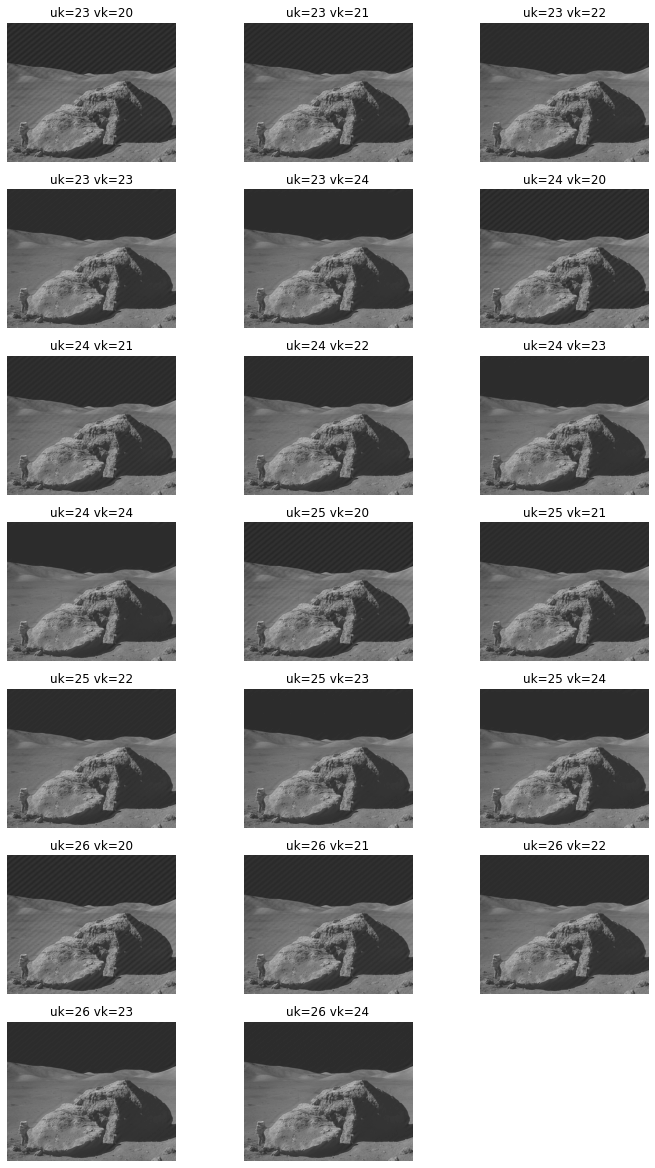

In [423]:
# 该部分用于查找冲击所在位置
fig = plt.figure(figsize=(12,24))
i = 0
uks = np.arange(23,27)
vks = np.arange(20,25)
for uk in uks:
    for vk in vks:
        image_pad_cen = image_centralized(image)
        # 傅里叶变换
        image_fft = np.fft.fft2(image_pad_cen)
        # 获取低通滤波器 并进行滤波
        mask = get_BNPF_H(uk,vk,d0=10,n=3,image=image)
        image_lpf = image_fft * mask
        # 进行反变换
        image_ifft = np.fft.ifft2(image_lpf)
        # 去中心化
        image_ifft_uncen = image_centralized(image_ifft)
        
        ax = fig.add_subplot(8,3,i+1)
        ax.imshow(image_ifft_uncen.real ,cmap = 'gray',vmin=0,vmax=255)
        ax.axis('off')
        ax.set_title(f"uk={uk} vk={vk}")
        i = i+1
plt.show()

## 5.4.2 最优陷波滤波（没有实现，不了解如何寻找噪声项，查阅相关资料后补上）

TiffTag 338: 999 is not a valid TIFF.EXTRASAMPLE


Text(0.5, 1.0, 'original')

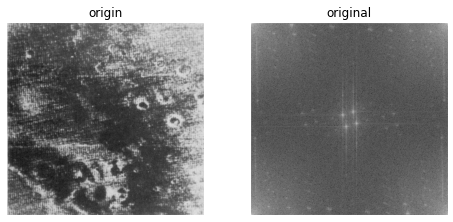

In [462]:
import numpy as np
import tifffile as tiff
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,12))

image = tiff.imread("G:/Python/图像数字处理/第五章 图像复原与重建/DIP3E_CH05_Original_Images/Fig0520(a)(NASA_Mariner6_Mars).tif")
image =255 - image[:,:,0]
ax = fig.add_subplot(3,2,1)
ax.imshow(image,cmap = 'gray',vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"origin")

fft_specturm = np.fft.fft2(image)
res = np.log(1 + np.abs(fft_specturm))
res_scale = image_scaling(res,255)
ax = fig.add_subplot(3,2,2)
ax.imshow(res_scale ,cmap = 'gray',vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"original")



### 下面几个滤波器设计到图像还原，目前代码正确性还有待商榷，等到后续需要用到图像还原时再深入研究

# 5.7 逆滤波

In [2]:
def get_BLPF_H(d,n,image):
    i = np.arange(image.shape[1])
    j = np.arange(image.shape[0])
    i,j = np.meshgrid(i,j)
    distance = np.sqrt(np.power((i - image.shape[1]//2),2) + np.power((j - image.shape[0]//2),2))
    mask = 1/(1+np.power(distance/d,2*n))
    return mask

def get_Turbulence_H(k,image):
    i = np.arange(image.shape[1])
    j = np.arange(image.shape[0])
    m = int(image.shape[1]/2)
    n = int(image.shape[0]/2)
    i,j = np.meshgrid(i,j)
    mask = np.exp(-k * np.power((np.power(i-m,2) + np.power(j-n,2)),5/6))
    return mask

# 定义湍流退化的变换函数
def degeneration_turbulence(k,image):
    # 中心化处理
    image_cen = image_centralized(image)
    # 变换
    image_fft = np.fft.fft2(image_cen)
    # 获取滤波函数 并进行滤波
    mask  = get_Turbulence_H(k,image)
    image_lpf = image_fft*mask
    # 进行反变换
    image_ifft = np.fft.ifft2(image_lpf)
    # 去中心化
    image_ifft_uncen = image_centralized(image_ifft)
    return image_ifft_uncen.real


Text(0.5, 1.0, 'k = 0.0025')

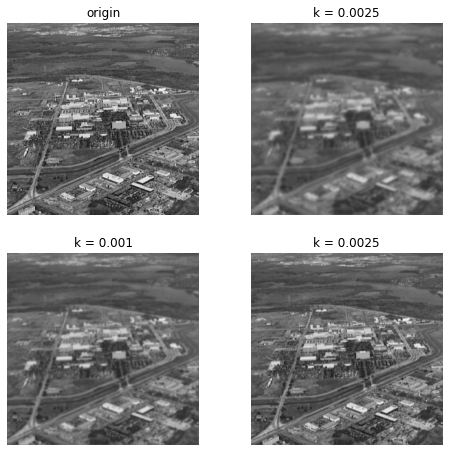

In [6]:
# 湍流退化函数对图像退化后的结果
import numpy as np
import tifffile as tiff
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,12))

# 读取图像
image = tiff.imread("G:/Python/图像数字处理/第五章 图像复原与重建/DIP3E_CH05_Original_Images/Fig0525(a)(aerial_view_no_turb).tif")
ax = fig.add_subplot(3,2,1)
ax.imshow(image,cmap = 'gray',vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"origin")

image_tur_0025 = degeneration_turbulence(0.0025,image)
ax = fig.add_subplot(3,2,2)
ax.imshow(image_tur_0025 ,cmap = 'gray',vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"k = 0.0025")

image_tur_001 = degeneration_turbulence(0.001,image)
ax = fig.add_subplot(3,2,3)
ax.imshow(image_tur_001 ,cmap = 'gray',vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"k = 0.001")

image_tur_00025 = degeneration_turbulence(0.00025,image)
ax = fig.add_subplot(3,2,4)
ax.imshow(image_tur_00025 ,cmap = 'gray',vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"k = 0.0025")

In [121]:
# image : 源图像 degeneration_function: 退化传递函数 e:误差
def InverseFilter(image,degeneration_function,e):
    # 中心化处理
    image_cen = image_centralized(image)
    # 变换
    image_fft = np.fft.fft2(image_cen)
    # 获取滤波函数 并进行滤波
    image_inverse = image_fft/(degeneration_function + e)
    # 进行反变换
    image_ifft = np.fft.ifft2(image_inverse)
    # 去中心化
    image_ifft_uncen = image_centralized(image_ifft)
    # 此处因为两个中心化的函数相除，不再需要进行去中心化处理
    return image_ifft_uncen.real

Text(0.5, 1.0, 'd = 90')

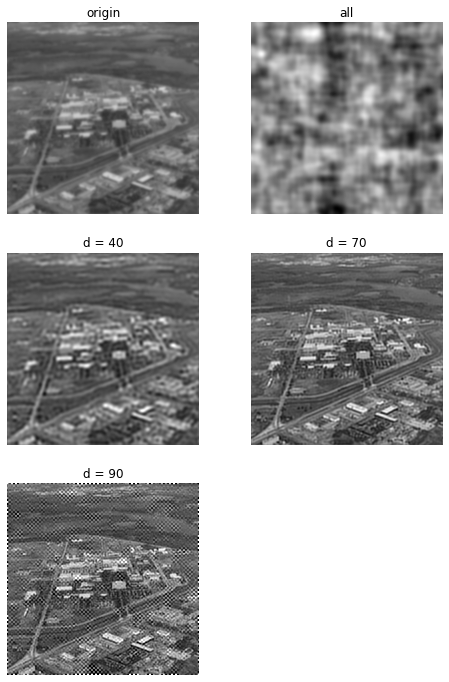

In [122]:
import numpy as np
import tifffile as tiff
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,12))

# 读取图像
image = tiff.imread("G:/Python/图像数字处理/第五章 图像复原与重建/DIP3E_CH05_Original_Images/Fig0525(b)(aerial_view_turb_c_0pt0025).tif")
ax = fig.add_subplot(3,2,1)
ax.imshow(image,cmap = 'gray',vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"origin")

# 不截断d的记结果
image_inverse = InverseFilter(image,get_Turbulence_H(0.0025,image),e=0)
ax = fig.add_subplot(3,2,2)
image_inverse = image_centralized(image_inverse)
image_inverse = image_scaling(image_inverse,255)
ax.imshow(image_inverse,cmap = 'gray',vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"all")

# 在d=40处截断的结果
mask = get_BLPF_H(40,10,image)
image_inverse2 = InverseFilter(image,get_Turbulence_H(0.0025,image)/mask,e=0)
ax = fig.add_subplot(3,2,3)
ax.imshow(image_inverse2,cmap = 'gray',vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"d = 40")

# 在d = 70 处截断的记过
mask = get_BLPF_H(70,10,image)
image_inverse3 = InverseFilter(image,get_Turbulence_H(0.0025,image)/mask,e=0)
ax = fig.add_subplot(3,2,4)
ax.imshow(image_inverse3,cmap = 'gray',vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"d = 70")

# 在d = 90 处截断的记过
mask = get_BLPF_H(90,10,image)
image_inverse4 = InverseFilter(image,get_Turbulence_H(0.0025,image)/mask,e=0)
ax = fig.add_subplot(3,2,5)
ax.imshow(image_inverse4,cmap = 'gray',vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"d = 90")


# 5.8 最小均方误差（维纳）滤波

In [175]:
# image : 源图像 degeneration_function: 退化传递函数 e:误差 k:调整系数
def WienerFilter(image,degeneration_function,k):
    # 中心化处理
    image_cen = image_centralized(image)
    # 变换
    image_fft = np.fft.fft2(image_cen)
    # 获取滤波函数 并进行滤波
    h_square = np.power(np.abs(degeneration_function),2)
    image_wiener =  image_fft*np.conj(degeneration_function)/(h_square+k)
    # 进行反变换
    image_ifft = np.fft.ifft2(image_wiener)
    # 去中心化
    image_ifft_uncen = image_centralized(image_ifft)
    return image_ifft_uncen.real

Text(0.5, 1.0, 'winer')

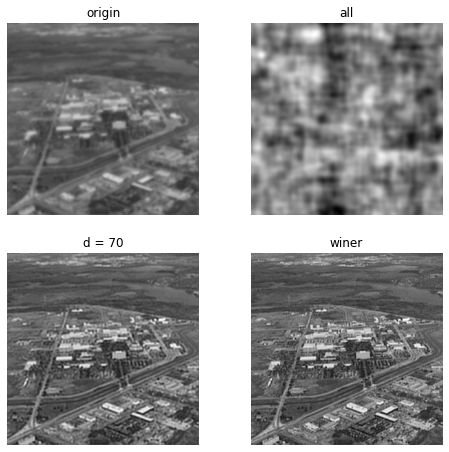

In [167]:
import numpy as np
import tifffile as tiff
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,12))

# 读取图像
image = tiff.imread("G:/Python/图像数字处理/第五章 图像复原与重建/DIP3E_CH05_Original_Images/Fig0525(b)(aerial_view_turb_c_0pt0025).tif")
ax = fig.add_subplot(3,2,1)
ax.imshow(image,cmap = 'gray',vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"origin")

# 不截断d的记结果
image_inverse = InverseFilter(image,get_Turbulence_H(0.0025,image),e=0)
ax = fig.add_subplot(3,2,2)
image_inverse = image_centralized(image_inverse)
image_inverse = image_scaling(image_inverse,255)
ax.imshow(image_inverse,cmap = 'gray',vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"all")

# 在d = 70 处截断的记过
mask = get_BLPF_H(70,10,image)
image_inverse3 = InverseFilter(image,get_Turbulence_H(0.0025,image)/mask,e=0)
ax = fig.add_subplot(3,2,3)
ax.imshow(image_inverse3,cmap = 'gray',vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"d = 70")

# 维纳滤波
image_wiener = WienerFilter(image,degeneration_function = get_Turbulence_H(0.0025,image),k = 0.0001,e=0)
ax = fig.add_subplot(3,2,4)
ax.imshow(image_wiener,cmap = 'gray',vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"winer")

In [168]:
# 添加运动模糊的函数
def get_motion_H(a,b,t,image):
    i = np.arange(image.shape[1])
    j = np.arange(image.shape[0])
    m = int(image.shape[1]/2)
    n = int(image.shape[0]/2)
    i,j = np.meshgrid(i,j)
    pi = np.pi
    mask = (t/(pi*((i-m)*a + (j-n)*b+1e-8)))*np.sin((pi*((i-m)*a + (j-n)*b)))*np.exp(-(pi*((i-m)*a + (j-n)*b))*1j)
    return mask

def Motion_degeneration(a,b,t,image):
    image_cen = image_centralized(image)
    # 变换
    image_fft = np.fft.fft2(image_cen)
    # 获取滤波函数 并进行滤波
    mask = get_motion_H(a,b,t,image) 
    image_lpf = image_fft * mask
    # 进行反变换
    image_ifft = np.fft.ifft2(image_lpf)
    # 去中心化
    image_ifft_uncen = image_centralized(image_ifft)
    return image_ifft_uncen.real

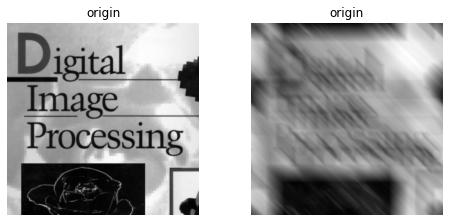

In [169]:
import numpy as np
import tifffile as tiff
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,12))

# 读取图像
image = tiff.imread("G:/Python/图像数字处理/第五章 图像复原与重建/DIP3E_CH05_Original_Images/Fig0526(a)(original_DIP).tif")
ax = fig.add_subplot(3,2,1)
ax.imshow(image,cmap = 'gray',vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"origin")

image_motion = Motion_degeneration(0.1,0.1,1,image)
image_motion = image_scaling(image_motion,255)
ax = fig.add_subplot(3,2,2)
ax.imshow(image_motion,cmap = 'gray',vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"origin")

plt.show()

Text(0.5, 1.0, 'winer')

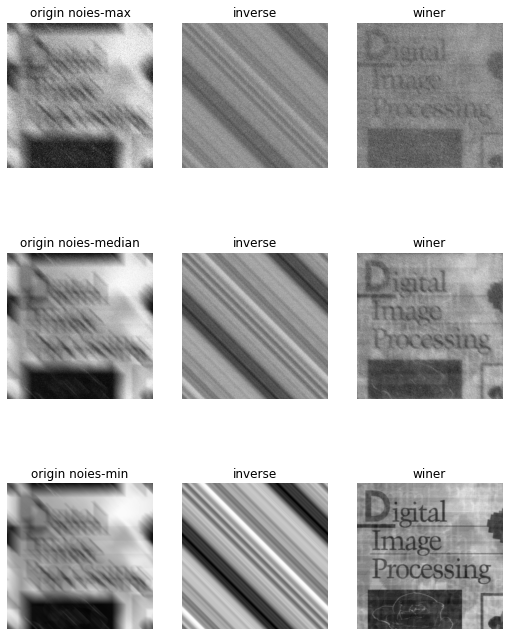

In [292]:
# 这个地方得出来的结果与书中的不太一样(感觉我的仍然会出现重影)
import numpy as np
import tifffile as tiff
import matplotlib.pyplot as plt
from scipy.signal import wiener

fig = plt.figure(figsize=(12,12))

# 读取图像 （噪声最大）
image = tiff.imread("G:/Python/图像数字处理/第五章 图像复原与重建/DIP3E_CH05_Original_Images/Fig0529(a)(noisiest_var_pt1).tif")
ax = fig.add_subplot(3,4,1)
ax.imshow(image,cmap = 'gray',vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"origin noies-max")
# 逆滤波结果
image_inverse = InverseFilter(image,get_motion_H(0.1,0.1,1,image),e=1e-8)
ax = fig.add_subplot(3,4,2)
ax.imshow(image_inverse,cmap = 'gray')
ax.axis('off')
ax.set_title(f"inverse")
# 维纳滤波
image_wiener = WienerFilter(image,degeneration_function=get_motion_H(0.1,0.1,1,image),k=0.01)
ax = fig.add_subplot(3,4,3)
ax.imshow(image_wiener,cmap = 'gray')
ax.axis('off')
ax.set_title(f"winer")



# 读取图像 （噪声中等）
image = tiff.imread("G:/Python/图像数字处理/第五章 图像复原与重建/DIP3E_CH05_Original_Images/Fig0529(d)(medium_noise_var_pt01).tif")
ax = fig.add_subplot(3,4,5)
ax.imshow(image,cmap = 'gray',vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"origin noies-median")
# 逆滤波结果
image_inverse = InverseFilter(image,get_motion_H(0.1,0.1,1,image),e=1e-8)
ax = fig.add_subplot(3,4,6)
ax.imshow(image_inverse,cmap = 'gray')
ax.axis('off')
ax.set_title(f"inverse")
# 维纳滤波
image_wiener = WienerFilter(image,degeneration_function=get_motion_H(0.1,0.1,1,image),k=0.01)
ax = fig.add_subplot(3,4,7)
ax.imshow(image_wiener,cmap = 'gray')
ax.axis('off')
ax.set_title(f"winer")


# 读取图像 （噪声最小）
image = tiff.imread("G:/Python/图像数字处理/第五章 图像复原与重建/DIP3E_CH05_Original_Images/Fig0529(g)(least_noise_var_10minus37).tif")
ax = fig.add_subplot(3,4,9)
ax.imshow(image,cmap = 'gray',vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"origin noies-min")
# 逆滤波结果
image_inverse = InverseFilter(image,get_motion_H(0.1,0.1,1,image),e=1e-8)
ax = fig.add_subplot(3,4,10)
ax.imshow(image_inverse,cmap = 'gray')
ax.axis('off')
ax.set_title(f"inverse")
# 维纳滤波
image_wiener = WienerFilter(image,degeneration_function=get_motion_H(0.1,0.1,1,image),k=0.0001)
ax = fig.add_subplot(3,4,11)
ax.imshow(image_wiener,cmap = 'gray')
ax.axis('off')
ax.set_title(f"winer")


# 5.9 约束最小二乘法滤波